In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
import os
os.getcwd()

'C:\\Users\\User\\Documents\\Project\\Check Coding Classification EBs 26 Jan 2022'

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df =pd.read_csv("L_Type_5_Group.csv", encoding="ISO-8859-1")
df

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,Type
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.590,0.413300,0.213,-0.671620,8510.137503,3.929937,2511.217871,3.399884,A-EW
1,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.110,-0.958607,0.024,-1.619789,3812.000000,3.581153,3135.000000,3.496238,A-EW
2,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.480,0.170262,0.340,-0.468521,6830.684264,3.834464,3142.690027,3.497302,A-EW
3,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.924,0.465977,0.401,-0.396856,9321.521112,3.969487,3445.048673,3.537195,A-EW
4,0.382600,0.1470,1.279,0.106871,0.179,-0.747147,1.435,0.156852,0.583,-0.234331,2.550,0.406540,0.410,-0.387216,8749.612792,3.941989,3531.490806,3.547958,A-EW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,0.395610,0.1500,1.730,0.238046,0.270,-0.568636,1.630,0.212188,0.750,-0.124939,6.340,0.802089,1.310,0.117271,7945.000000,3.900094,7966.260000,3.901254,W-EW
11142,0.483170,0.1400,1.620,0.209515,0.220,-0.657577,1.800,0.255273,0.760,-0.119186,4.860,0.686636,1.440,0.158362,7073.000000,3.849604,8020.720000,3.904213,W-EW
11143,0.368450,0.2200,1.390,0.143015,0.310,-0.508638,1.390,0.143015,0.740,-0.130768,2.550,0.406540,0.710,-0.148742,8142.000000,3.910731,8142.950000,3.910782,W-EW
11144,0.498300,0.4420,1.849,0.266937,0.818,-0.087247,1.775,0.249198,1.224,0.087781,5.062,0.704322,2.668,0.426186,11550.680000,4.062608,8172.689581,3.912365,W-EW


In [4]:
len(df)

11146

In [5]:
#เช็ค colums ทั้งหมดของงาน
df.columns

Index(['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1', 'R2', 'logR2',
       'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2', 'logT2', 'Type'],
      dtype='object')

In [6]:
#เช็คประเภทของของข้อมูลในแต่ละคอลัมน์
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11146 entries, 0 to 11145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       11146 non-null  float64
 1   q       11146 non-null  float64
 2   M1      11146 non-null  float64
 3   logM1   11146 non-null  float64
 4   M2      11146 non-null  float64
 5   logM2   11146 non-null  float64
 6   R1      11146 non-null  float64
 7   logR1   11146 non-null  float64
 8   R2      11146 non-null  float64
 9   logR2   11146 non-null  float64
 10  L1      11146 non-null  float64
 11  logL1   11146 non-null  float64
 12  L2      11146 non-null  float64
 13  logL2   11146 non-null  float64
 14  T1      11146 non-null  float64
 15  logT1   11146 non-null  float64
 16  T2      11146 non-null  float64
 17  logT2   11146 non-null  float64
 18  Type    11146 non-null  object 
dtypes: float64(18), object(1)
memory usage: 1.6+ MB


In [7]:
#เช็คประภทของดาวคู่ที่พิจารณาจากโรชซ์โมเดล
df.Type.value_counts()

EA      6372
W-EW    1832
EB      1034
A-EW     997
EW       911
Name: Type, dtype: int64

In [8]:
from sklearn.cluster import KMeans

In [9]:
x = df[['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1',
       'R2', 'logR2', 'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2',
       'logT2']]

In [10]:
model = KMeans(n_clusters=5)
model

KMeans(n_clusters=5)

In [11]:
model.fit(x)

KMeans(n_clusters=5)

In [12]:
model.cluster_centers_

array([[ 9.15778047e+00,  3.77792828e-01,  2.14797380e+00,
         2.66478263e-01,  8.77691363e-01, -2.31591103e-01,
         2.22854666e+00,  2.57908354e-01,  2.48370629e+00,
         2.19586617e-01,  1.20891193e+02,  9.81431318e-01,
         4.30365410e+01,  4.32503981e-01,  7.87462613e+03,
         3.87590157e+00,  5.91037746e+03,  3.75938449e+00],
       [ 2.11359554e+00,  8.32000000e-01,  2.54940000e+01,
         1.39706166e+00,  2.11060000e+01,  1.31197491e+00,
         1.29200000e+01,  1.07560778e+00,  1.20300000e+01,
         1.03600618e+00,  3.08059620e+05,  5.48779724e+00,
         1.71651369e+05,  5.16130606e+00,  3.41780000e+04,
         4.53048880e+00,  3.34600000e+04,  4.52157307e+00],
       [ 4.28172872e+00,  6.06842105e-01,  1.55368421e+01,
         1.15242876e+00,  1.02884211e+01,  8.61744555e-01,
         8.91578947e+00,  9.24889113e-01,  8.92631579e+00,
         9.27311928e-01,  1.69990756e+05,  5.22938844e+00,
         3.48683084e+04,  3.60739659e+00,  2.58789474e

In [13]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
df['Type'].values

array(['A-EW', 'A-EW', 'A-EW', ..., 'W-EW', 'W-EW', 'W-EW'], dtype=object)

In [15]:
pd.crosstab((df['Type']),model.labels_)

col_0,0,1,2,3,4
Type,,,,,
A-EW,997,0,0,0,0
EA,6327,2,13,1,29
EB,999,4,6,5,20
EW,907,4,0,0,0
W-EW,1832,0,0,0,0


In [16]:
x = df.iloc[:,3:5].values

In [17]:
x

array([[ 0.09551804,  0.098     ],
       [-0.20760831,  0.42      ],
       [ 0.04493155,  0.192     ],
       ...,
       [ 0.1430148 ,  0.31      ],
       [ 0.26693691,  0.818     ],
       [ 0.13987909,  0.21      ]])

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[41296.56004471986,
 15072.867641850009,
 9110.43918376587,
 5482.548648889325,
 3751.301959988688,
 2872.294622701471,
 2105.6415234223246,
 1507.7279605738909,
 1234.9197241111892,
 968.4072253060151]

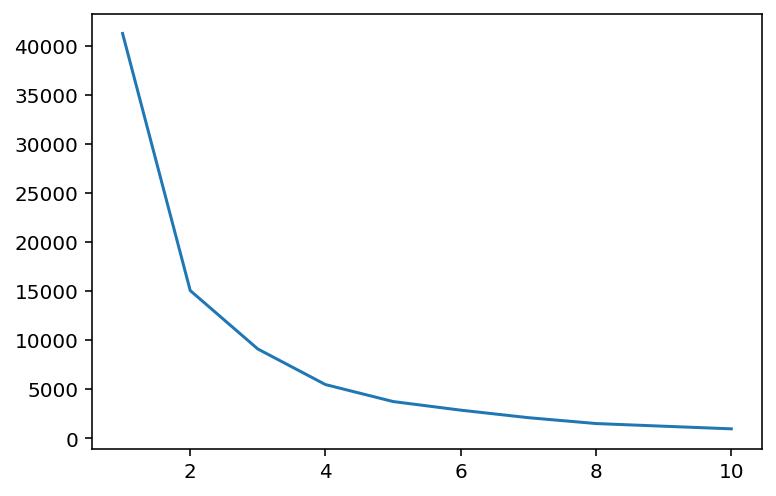

In [20]:
plt.plot(range(1,11),wcss)

In [21]:
kmeans = KMeans(n_clusters=5,init='k-means++')
y_means = kmeans.fit_predict(x)

In [22]:
y_means

array([2, 2, 2, ..., 2, 2, 2])

In [23]:
pd.concat([df,pd.DataFrame(y_means)],axis=1)

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,Type,0
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.590,0.413300,0.213,-0.671620,8510.137503,3.929937,2511.217871,3.399884,A-EW,2
1,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.110,-0.958607,0.024,-1.619789,3812.000000,3.581153,3135.000000,3.496238,A-EW,2
2,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.480,0.170262,0.340,-0.468521,6830.684264,3.834464,3142.690027,3.497302,A-EW,2
3,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.924,0.465977,0.401,-0.396856,9321.521112,3.969487,3445.048673,3.537195,A-EW,2
4,0.382600,0.1470,1.279,0.106871,0.179,-0.747147,1.435,0.156852,0.583,-0.234331,2.550,0.406540,0.410,-0.387216,8749.612792,3.941989,3531.490806,3.547958,A-EW,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,0.395610,0.1500,1.730,0.238046,0.270,-0.568636,1.630,0.212188,0.750,-0.124939,6.340,0.802089,1.310,0.117271,7945.000000,3.900094,7966.260000,3.901254,W-EW,2
11142,0.483170,0.1400,1.620,0.209515,0.220,-0.657577,1.800,0.255273,0.760,-0.119186,4.860,0.686636,1.440,0.158362,7073.000000,3.849604,8020.720000,3.904213,W-EW,2
11143,0.368450,0.2200,1.390,0.143015,0.310,-0.508638,1.390,0.143015,0.740,-0.130768,2.550,0.406540,0.710,-0.148742,8142.000000,3.910731,8142.950000,3.910782,W-EW,2
11144,0.498300,0.4420,1.849,0.266937,0.818,-0.087247,1.775,0.249198,1.224,0.087781,5.062,0.704322,2.668,0.426186,11550.680000,4.062608,8172.689581,3.912365,W-EW,2


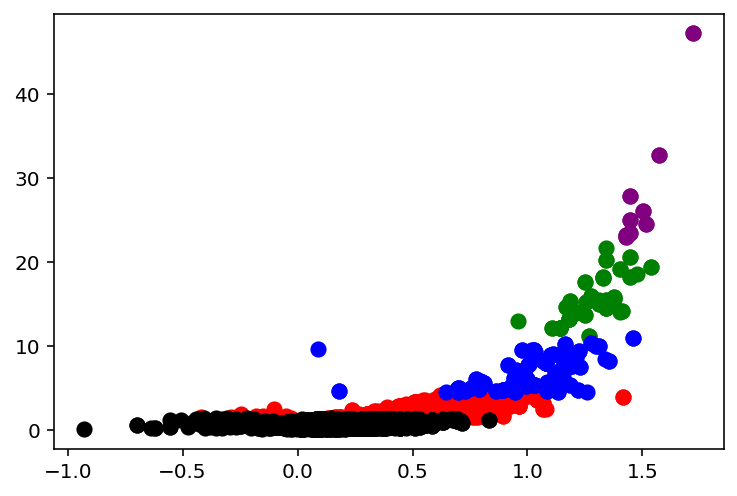

In [24]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=50,c='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=50,c='green')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=50,c='black')
plt.scatter(x[y_means==3,0], x[y_means==3,1], s=50,c='blue')
plt.scatter(x[y_means==4,0], x[y_means==4,1], s=50,c='purple')
plt.scatter(x[y_means==5,0], x[y_means==5,1], s=50,c='yellow')

